In [209]:
import matplotlib.pyplot as plt, json, pandas as pd, numpy as np

In [210]:
def polyFit(x, y, degree):
    """
    Returns a list of polynomial constants for least squares fit of specified degree
    given x, y values in an ndarray
    """
    assert len(x) == len(y)
    assert len(x) >= degree
    
    # Make A matrix
    X = np.ones((len(x), degree+1))
    for i in range(len(x)):
        for j in range(degree+1):
            X[i][j] = x[i]**j
    
    # Solve for constants c, from Xc = Y equation
    c = np.linalg.inv(X.T @ X) @ X.T @ y.T
    return c

In [211]:
def polyPlot(data, degree, ax):
    
    # Get constants from polyFit
    c = []
    for d in range(degree):
        c.append(polyFit(data[:,0], data[:,1], d+1))
    
    # Calculate y values for plotting
    xx = np.linspace(0,1, 101)
    plotData = pd.DataFrame({
        "x": xx
    })
    
    one_norm = 0
    
    for i in range(len(c)):
        
        yy = 0
        f = ''
        for j in range(len(c[i])):
            yy += c[i][j] * xx**j
            
            # Build label
            constant = c[i][j]
            if (j == 0):
                f += f'{constant}'
            elif (j == 1):
                f += f' + {constant}x'
            else:
                f += f' + {constant}x^{j}'
        
        l1 = f'{round(sum(abs(yy - data[:,1])),3)}'
        text = f"Degree {j}, L1={l1}"
        plotData[text] = yy
        print(f'L1: {l1}, Constants: {list(c[j-1])}\n')

    # Plotting
    for y in plotData:
        if y == 'x':
            continue
        plotData.plot.line(x='x', y=y, ax=ax)
    
    return plotData

L1: 13218.88, Constants: [-331.4223325305767, 2636.7892856552126]

L1: 9264.432, Constants: [-101.34606306008561, 1242.3876525007418, 1394.401633154468]

L1: 3530.579, Constants: [151.43620738559298, -1868.6424670926044, 9210.798369261027, -5210.9311574043695]

L1: 405.531, Constants: [44.26238891362142, 375.40551643931934, -1005.0008879741483, 10732.571390000772, -7971.7512737054985]

L1: 422.726, Constants: [42.269635886376186, 439.65334117857594, -1463.7078379900572, 11964.776002927943, -9361.351243242934, 555.8399879082426]

L1: 217.363, Constants: [55.6489554733093, -183.95105474702473, 4958.749552056013, -14036.764900626062, 39649.00648621518, -42655.66474164178, 14403.834906963151]

L1: 53.883, Constants: [48.413353714473715, 283.3235754945714, -1610.881204748206, 23103.51813950535, -63356.06422531966, 106274.91636535438, -93324.71769579448, 30779.586386709692]

L1: 11.409, Constants: [50.157457327217685, 131.80461434862264, 1185.1305256007618, 2114.1401911480934, 16304.26230303

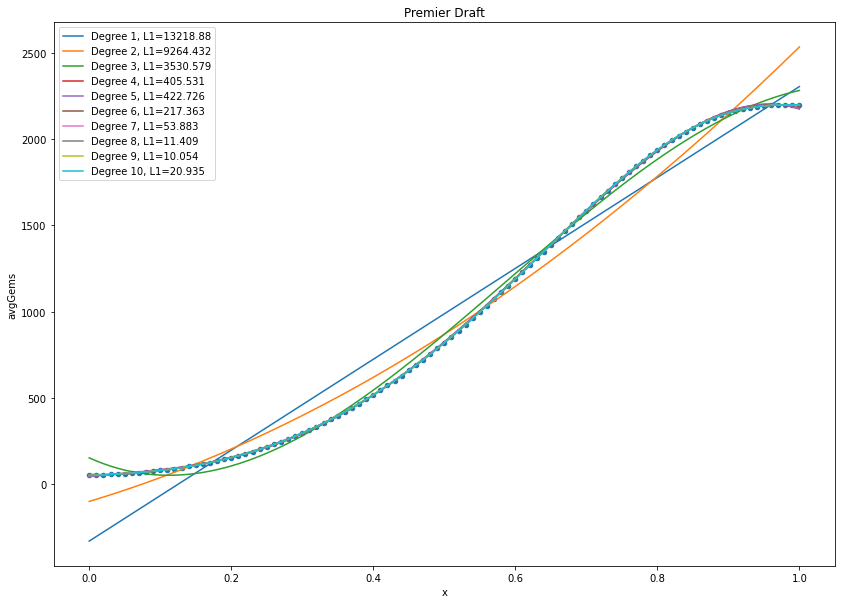

In [212]:

fig,ax = plt.subplots()
fig.set_size_inches(14,10)
ax.set_title('Premier Draft')
ax.set_ylabel('Average Gems')

premierLookup = json.load(open('premierLookup.json', 'r'))
premierDF = pd.DataFrame.from_dict(premierLookup, orient='index').reset_index().astype(np.double)
premierDF = premierDF.rename(columns={'index':'percent'})
premierDF.plot.scatter(x='percent', y='avgGems', ax=ax)

polyPlot(
    data=premierDF[['percent', 'avgGems']].to_numpy(), degree=10, ax=ax
)
None

L1: 37.025, Constants: [0.017045668899242708, 6.048873695864881]

L1: 19.562, Constants: [0.7696378141825727, 1.4877091789962757, 4.561164516868597]

L1: 11.576, Constants: [1.2737641828941597, -4.71665125489726, 20.149487606281284, -10.392215392941761]

L1: 2.166, Constants: [0.9252579981054119, 2.580509678366732, -13.070092273012506, 41.452622499114895, -25.922418946036895]

L1: 1.546, Constants: [0.9700675765806231, 1.1358159007254969, -2.7554850718938155, 13.744939900743699, 5.3244977499782635, -12.498766678163875]

L1: 0.722, Constants: [1.0195154266572812, -1.1689273899576325, 20.980902419169787, -82.3526459293659, 186.45903420887657, -172.20165892016985, 53.23429740582753]

L1: 0.154, Constants: [0.9953783212952536, 0.3898471184031189, -0.9346341036209296, 41.54308997672797, -157.1540994681509, 324.6137244649094, -306.1358318572279, 102.67717957192247]

L1: 0.027, Constants: [1.0003570639027253, -0.04268029880856261, 7.046912139030155, -18.373595833788386, 70.24582489457043, -15

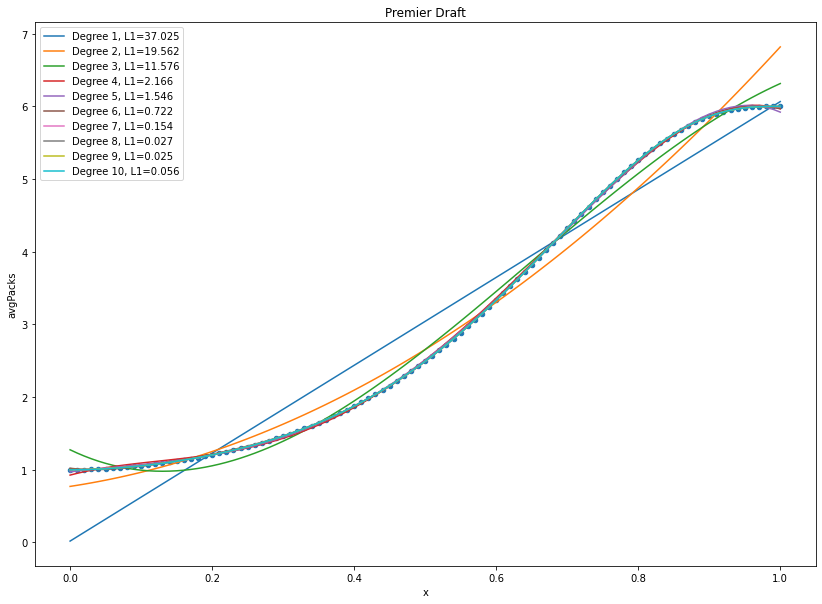

In [213]:
fig,ax = plt.subplots()
fig.set_size_inches(14,10)
ax.set_title('Premier Draft')
ax.set_ylabel('Average Packs')

premierDF.plot.scatter(x='percent', y='avgPacks', ax=ax)

polyPlot(
    data=premierDF[['percent', 'avgPacks']].to_numpy(), degree=10, ax=ax
)
None

L1: 6009.015, Constants: [-108.53678974373909, 1085.3089163191612]

L1: 3580.233, Constants: [6.826121893177456, 386.13975488331243, 699.1691614358476]

L1: 1945.136, Constants: [100.00771021548007, -760.6603246915906, 3580.4798702269923, -1920.8738058607591]

L1: 297.56, Constants: [41.27634041458364, 469.08042589976424, -2017.7893016721343, 6816.183036754432, -4368.528421308993]

L1: 266.486, Constants: [44.39809698069398, 368.4326976664025, -1299.1997996475786, 4885.867179542041, -2191.6441375828144, -870.7537134514623]

L1: 108.874, Constants: [53.040047895605895, -34.3649654630384, 2849.184730488697, -11909.011088913212, 29465.056328076673, -28781.867309466543, 9303.704530701161]

L1: 19.363, Constants: [49.41578136312502, 199.69014032566457, -441.50488447718453, 6694.33956723976, -22129.58145109353, 45816.59019114636, -44656.8977603956, 15417.314908167747]

L1: 4.701, Constants: [50.034438537573195, 145.9440564146371, 550.2674764168405, -750.7812855812663, 6126.646088509122, -133

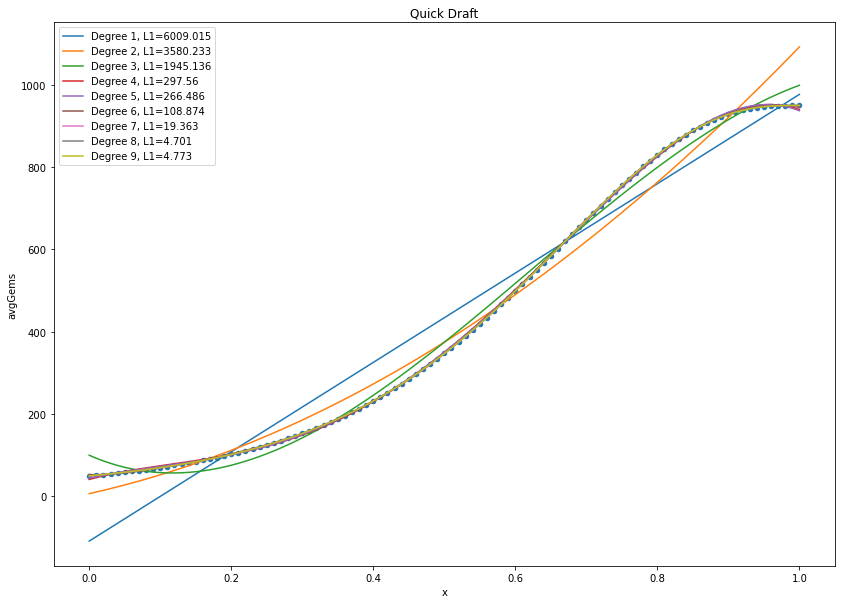

In [219]:
fig,ax = plt.subplots()
fig.set_size_inches(14,10)
ax.set_title('Quick Draft')
ax.set_ylabel('Average Gems')

quickLookup = json.load(open('quickLookup.json', 'r'))
quickDF = pd.DataFrame.from_dict(quickLookup, orient='index').reset_index().astype(np.double)
quickDF = quickDF.rename(columns={'index':'percent'})
quickDF.plot.scatter(x='percent', y='avgGems', ax=ax)

polyPlot(
    data=quickDF[['percent', 'avgGems']].to_numpy(), degree=9, ax=ax
)
None

L1: 9.232, Constants: [1.0083401997670354, 0.9250559727431564]

L1: 2.846, Constants: [1.214145761884304, -0.32225046433117016, 1.2473064370743219]

L1: 2.888, Constants: [1.256784383148095, -0.8470105069389391, 2.565754837315439, -0.878965600160718]

L1: 0.934, Constants: [1.1708970051926597, 0.951333529508771, -5.621022721204236, 11.897901443981171, -6.388433522073451]

L1: 0.273, Constants: [1.1988589045709814, 0.049821320551754145, 0.8154584672969349, -5.392139208300925, 13.11014626770389, -7.799431915830247]

L1: 0.239, Constants: [1.2058144500830674, -0.2743736853802865, 4.154319809864937, -18.909634847079303, 38.58930149094272, -30.263920797177548, 7.488162957823079]

L1: 0.069, Constants: [1.197930576000973, 0.2347667713706887, -3.0039226187171124, 21.55826376655159, -73.64459700933821, 132.01022365170434, -109.89242185428793, 33.53730986584793]

L1: 0.012, Constants: [1.2001928682983916, 0.03823242923211723, 0.6228406358855523, -5.667549566021535, 29.68470449983306, -84.297816

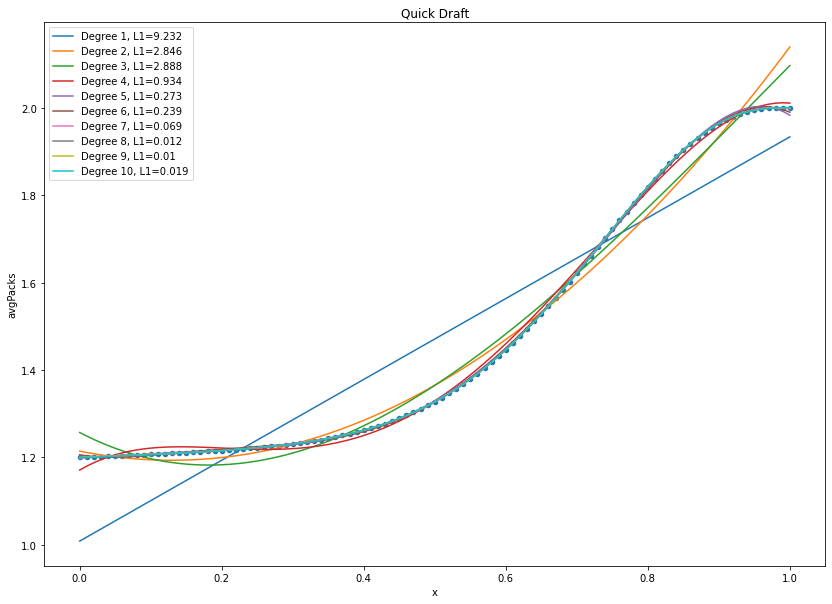

In [215]:
fig,ax = plt.subplots()
fig.set_size_inches(14,10)
ax.set_title('Quick Draft')
ax.set_ylabel('Average Packs')

quickDF.plot.scatter(x='percent', y='avgPacks', ax=ax)

polyPlot(
    data=quickDF[['percent', 'avgPacks']].to_numpy(), degree=10, ax=ax
)
None

L1: 19828.291, Constants: [-495.04723576004665, 3000.034475480489]

L1: 19.723, Constants: [0.03902737106636067, -0.48833137471945065, 3000.522806855206]

L1: 19.643, Constants: [0.012910530747248572, -0.16690742055894248, 2999.7152360352356, 0.5383805466955209]

L1: 19.225, Constants: [-0.052627034575248643, 1.205344181627538, 2993.4682007091787, 10.287947990817884, -4.874783724157169]

L1: 19.124, Constants: [0.029473489504420414, -1.4416360939516153, 3012.366711563519, -40.47830347879608, 52.376082451424736, -22.900346365502628]

L1: 19.133, Constants: [0.004724749022038566, -0.2880742261445448, 3000.4862530454775, 7.620148948575661, -38.28480292021413, 57.03364809867344, -26.6446677527274]

L1: 19.163, Constants: [-0.023333710963637344, 1.5201665774497997, 2975.068435375455, 151.3132736692205, -436.8041245533386, 633.2352915386437, -443.4384859295096, 119.08393518981757]

L1: 19.008, Constants: [0.002252211450787911, -0.7078017907042522, 3015.947906242727, -155.35076594515704, 726.

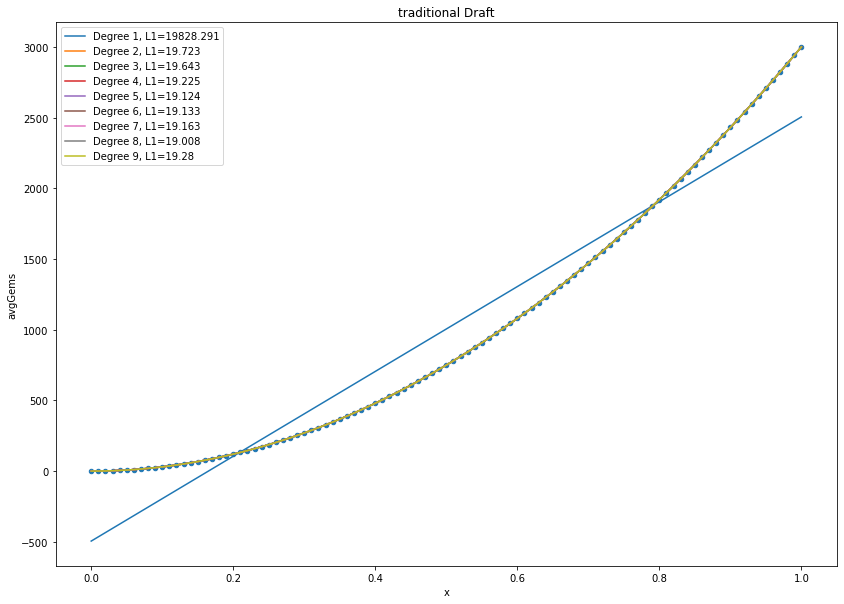

In [216]:
fig,ax = plt.subplots()
fig.set_size_inches(14,10)
ax.set_title('traditional Draft')
ax.set_ylabel('Average Gems')

traditionalLookup = json.load(open('traditionalLookup.json', 'r'))
traditionalDF = pd.DataFrame.from_dict(traditionalLookup, orient='index').reset_index().astype(np.double)
traditionalDF = traditionalDF.rename(columns={'index':'percent'})
traditionalDF.plot.scatter(x='percent', y='avgGems', ax=ax)

polyPlot(
    data=traditionalDF[['percent', 'avgGems']].to_numpy(), degree=9, ax=ax
)
None

L1: 20.571, Constants: [0.3108750184041932, 5.388163464181711]

L1: 6.759, Constants: [0.8060012477780869, 2.3873984376733244, 3.000765026508377]

L1: 0.035, Constants: [1.0000196978713674, -0.00041634432364678897, 9.000098671941068, -3.99955576362173]

L1: 0.034, Constants: [0.9999153701284691, 0.001768111463353872, 8.990154159935761, -3.9840356511940893, -0.007760056218248934]

L1: 0.034, Constants: [1.0000073154934292, -0.0011962724153593562, 9.011318820651468, -4.040889363306938, 0.05635585082033856, -0.02564636257697117]

L1: 0.034, Constants: [0.9999663751618644, 0.0007120140765035643, 8.99166550002112, -3.9613222038408367, -0.09362048280843283, 0.10658495006623525, -0.04407711089567101]



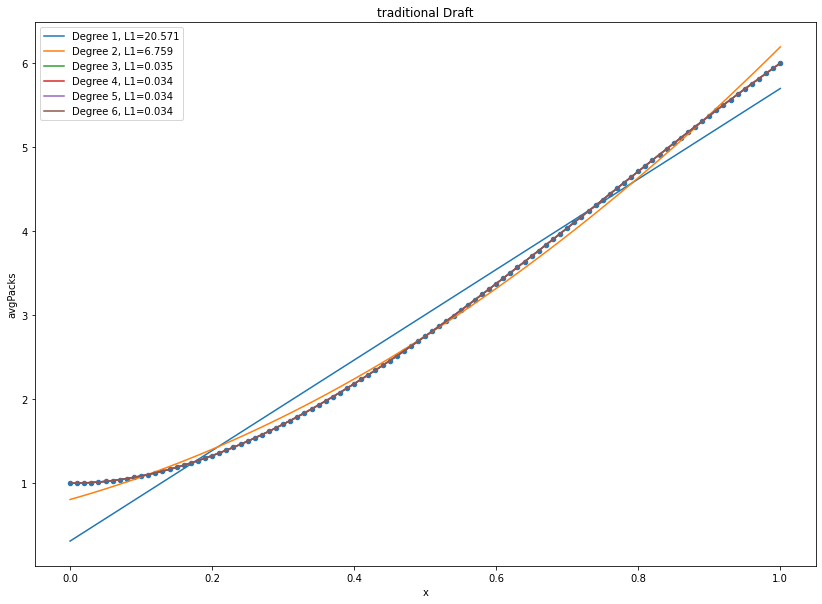

In [217]:
fig,ax = plt.subplots()
fig.set_size_inches(14,10)
ax.set_title('traditional Draft')
ax.set_ylabel('Average Packs')

traditionalDF.plot.scatter(x='percent', y='avgPacks', ax=ax)

polyPlot(
    data=traditionalDF[['percent', 'avgPacks']].to_numpy(), degree=6, ax=ax
)
None